# Redes Neuronales

## Introducción

En este cuaderno vamos a utilizar datos ficticios sobre precios de venta de viviendas para aprender a hacer redes neuronales. 

El primer paso consiste en importar y revisar las características principales de los datos. Para ello vamos a usar la librería *pandas*.

In [1]:
import pandas as pd #esta es para importar y manipular datos

data=pd.read_csv('G:/Mi unidad/Documentos personales/9-Documentos Doctorado/Doctorado 2023/7-Clases/SRGVUA/rawdata/HousingPrices.csv')
data.describe()

#Si les sale un mensaje pero el código se ejecuta, no se preocupen. Es sólo una advertencia.

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,346.992466,1515.463699,1.565068,0.382877,2.866438,6.517808,2007.815753,180921.195890
std,30.202904,436.528436,525.480383,0.550916,0.502885,0.815778,1.625393,1.328095,79442.502883
min,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,34900.000000
25%,1954.000000,0.000000,1129.500000,1.000000,0.000000,2.000000,5.000000,2007.000000,129975.000000
50%,1973.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,6.000000,2008.000000,163000.000000
75%,2000.000000,728.000000,1776.750000,2.000000,1.000000,3.000000,7.000000,2009.000000,214000.000000
max,2010.000000,2065.000000,5642.000000,3.000000,2.000000,8.000000,14.000000,2010.000000,755000.000000


Tenemos 1460 observaciones, y las columnas indican: 
- *YearBuilt:* El año en que la propiedad fue construida.
- *2ndFlrSF:* Área del segundo piso en pies cuadrados.
- *GrLivArea:* Área habitable total en pies cuadrados.
- *FullBath:* Número total de baños completos.
- *HalfBath:* Número total de medios baños (baños sin ducha o bañera).
- *BedroomAbvGr:* Número total de dormitorios por encima del nivel del suelo.
- *TotRmsAbvGrd:* Número total de habitaciones por encima del nivel del suelo.
- *YrSold:* El año en que la propiedad fue vendida.
- *SalePrice:* El precio de venta de la propiedad.

Ahora veamos las primera filas.

In [2]:
data.head()

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
0,2003,854,1710,2,1,3,8,2008,208500
1,1976,0,1262,2,0,3,6,2007,181500
2,2001,866,1786,2,1,3,6,2008,223500
3,1915,756,1717,1,0,3,7,2006,140000
4,2000,1053,2198,2,1,4,9,2008,250000


Por si acaso, siempre es recomendable revisar si hay valores nulos en nuestros datos; es decir, celdas sin ninguna información, que podrían confundir a nuestro modelo.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     1460 non-null   int64
 1   2ndFlrSF      1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
 7   YrSold        1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


## Estandarización de los datos

La literatura recomienda que, antes de empezar con el modelo es necesario estandarizar los datos para obtener mejores resultados (Truong et. al., 2020; Akram et. al., 2024). Dado que podemos tener dos tipos de datos, podemos seguir las siguientes estrategias (Amat Rodrigo, s.f.):

**One-hot encoding de las variables categóricas**

Consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1. 

In [4]:
# Crear un pequeño dataset de ejemplo
datos = {'ID': [1, 2, 3],
         'Color': ['Rojo', 'Verde', 'Azul']}
df = pd.DataFrame(datos)

# Mostrar el dataset original
print("Dataset Original:")
print(df)
print("\n")

# Aplicar one-hot encoding a la variable 'Color'
df_encoded = pd.get_dummies(df, columns=['Color'], prefix='color')

# Convertir valores booleanos a enteros (1 y 0)
df_encoded = df_encoded.astype(int)

# Mostrar el dataset después del one-hot encoding
print("Dataset después de One-Hot Encoding:")
print(df_encoded)

Dataset Original:
   ID  Color
0   1   Rojo
1   2  Verde
2   3   Azul


Dataset después de One-Hot Encoding:
   ID  color_Azul  color_Rojo  color_Verde
0   1           0           1            0
1   2           0           0            1
2   3           1           0            0


**Estandarización y escalado de variables numéricas**

- Centrado: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen.

- Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala.

    - Normalización Z-score: dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener un rango de [+∞, −∞].

    - Estandarización max-min: transformar los datos de forma que estén dentro del rango [0, 1].

In [5]:
import pandas as pd

# Crear un DataFrame de ejemplo
datos = {'Predictor1': [10, 20, 30, 40, 50],
        'Predictor2': [1, 5, 10, 8, 12],
        'Variable_respuesta': [15, 25, 35, 45, 55]}
df = pd.DataFrame(datos)

# Mostrar el DataFrame original
print("DataFrame Original:")
print(df)
print("\n")

# Obtener solo la columna Predictor1 y llamarle Columna1
df['Columna1'] = df['Predictor1']
df = df[['Columna1']]

# Mostrar el promedio de la columna Columna1
print(f"Promedio de la columna Columna1: {df['Columna1'].mean()}")
print("\n")

# 1. Centrado
df_centrado = df - df.mean()

# Mostrar el DataFrame después de centrar
print("DataFrame Centrado:")
print(df_centrado)
print("\n")

# 2. Normalización Z-score
mean_columna1 = df['Columna1'].mean()
std_columna1 = df['Columna1'].std()
df_zscore = (df - mean_columna1) / std_columna1

# Mostrar la desviación estándar de la columna Columna1
print(f"Desviación estándar de la columna Columna1: {std_columna1}")
print("\n")

# Mostrar el DataFrame después de la normalización Z-score
print("DataFrame Normalizado Z-score:")
print(df_zscore)
print("\n")

# 3. Estandarización max-min
min_columna1 = df['Columna1'].min()
max_columna1 = df['Columna1'].max()
df_minmax = (df - min_columna1) / (max_columna1 - min_columna1)

# Mostrar el valor máximo y mínimo de la columna Columna1
print(f"Valor mínimo de la columna Columna1: {min_columna1}")
print(f"Valor máximo de la columna Columna1: {max_columna1}")
print("\n")

# Mostrar la fórmula de la estandarización max-min con notación matemática
print("Fórmula Estandarización max-min:")
print("X_norm = (X_z-score - min(X_z-score)) / (max(X_z-score) - min(X_z-score))")
print("\n")

# Mostrar el DataFrame después de la estandarización max-min
print("DataFrame Estandarizado max-min:")
print(df_minmax)

DataFrame Original:
   Predictor1  Predictor2  Variable_respuesta
0          10           1                  15
1          20           5                  25
2          30          10                  35
3          40           8                  45
4          50          12                  55


Promedio de la columna Columna1: 30.0


DataFrame Centrado:
   Columna1
0     -20.0
1     -10.0
2       0.0
3      10.0
4      20.0


Desviación estándar de la columna Columna1: 15.811388300841896


DataFrame Normalizado Z-score:
   Columna1
0 -1.264911
1 -0.632456
2  0.000000
3  0.632456
4  1.264911


Valor mínimo de la columna Columna1: 10
Valor máximo de la columna Columna1: 50


Fórmula Estandarización max-min:
X_norm = (X_z-score - min(X_z-score)) / (max(X_z-score) - min(X_z-score))


DataFrame Estandarizado max-min:
   Columna1
0      0.00
1      0.25
2      0.50
3      0.75
4      1.00


Como tenemos sólo variables numéricas, nos corresponde estandarizarlas. Tengan en cuenta que [hay muchas formas de estandarizar datos](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-minmax-scaler-section). En el caso de los precios de vivienda, estos suelen tener outliers, y la estandarización [*max-min*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) es la menos sensible a ellos. En el caso de Akram et al. (2024), por ejemplo, usan otra.

Para proceder, vamos a usar una librería llamada *sklearn*, específicamente la función *preprocessing*.

In [6]:
from sklearn import preprocessing

Primero, le vamos a indicar a la computadora cuáles son nuestras variables independientes (X) y cuál es la dependiente (Y).

In [7]:
X=data.drop(columns=['SalePrice']) #Xs son todas menos el precio de venta
Y=data[['SalePrice']] #Y es el precio de venta

Y ahora estandarizamos.

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

Lo hacemos sólo sobre las X. Si lo hiciéramos sobre Y sería difícil interpretar los resultados. 

**Ojo**, ahora *X_scale* ya no es un dataframe, sino un array. Python los entiende de manera distinta; y, por ejemplo, sobre un array no podemos usar el `X_scale.head()` para ver sus primeras filas, solo las podemos ver como se indica a continuación.

In [9]:
X_scale

array([[0.94927536, 0.41355932, 0.25923135, ..., 0.375     , 0.5       ,
        0.5       ],
       [0.75362319, 0.        , 0.17483044, ..., 0.375     , 0.33333333,
        0.25      ],
       [0.93478261, 0.41937046, 0.27354936, ..., 0.375     , 0.33333333,
        0.5       ],
       ...,
       [0.5       , 0.55786925, 0.37792012, ..., 0.5       , 0.58333333,
        1.        ],
       [0.56521739, 0.        , 0.14016579, ..., 0.25      , 0.25      ,
        1.        ],
       [0.67391304, 0.        , 0.17370008, ..., 0.375     , 0.33333333,
        0.5       ]])

## Datos para el entrenamiento y para el testeo del modelo

Cuando estamos haciendo un modelo para **predecir** valores, lo ideal es tener datos para entrenar el modelo, y otros con los que puedas contrastar qué tan certero es. Usualmente, la partición suele ser 75-80% de datos para el entrenamiento (elegidos aleatoriamente), y 15-20% para el testeo (Truong et. al., 2020; Akram et. al., 2024).

Para elegirlos, vamos a seguir usando *sklearn*.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.2)

## Empezamos con el modelo

El primer paso va a ser instalar dos librerías que no vienen por defecto con Anaconda: *tensorflow* y *keras*.

In [12]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow

Ahora importamos *tensorflow* y algunas funciones específicas de *keras*.

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Y a continuación empezamos con el armado del modelo. 
1. Almacenaremos nuestro modelo en la variable 'model', y lo describiremos secuencialmente (capa por capa) en las siguientes líneas de código.
2. Le indicamos que el layer de entrada, o *input layer*, tendrá 128 elemntos y 8 inputs (que es la cantidad de variables independientes).
3. Los siguientes dos layers son los *hidden layers*. Siguiendo el ejemplo de Akram et al. (2024), uno tendrá 128 elementos y el otro 64. No se indican inputs porque Python asume que, al ser un modelo secuencial, los inputs son las capas que les preceden.
4. Indicamos el *output layer*, o layer final, que tendrá una sola unidad pues necesitamos una sola aproximación al precio de las viviendas.

Noten que todas las capas son **densas**. La cantidad de layers y la cantidad de elementos que tiene cada uno de ellos no tiene mucha ciencia: se deben ir ajustando hasta encontrar los mejores resultados (Akram et al., 2024). 

In [15]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
])

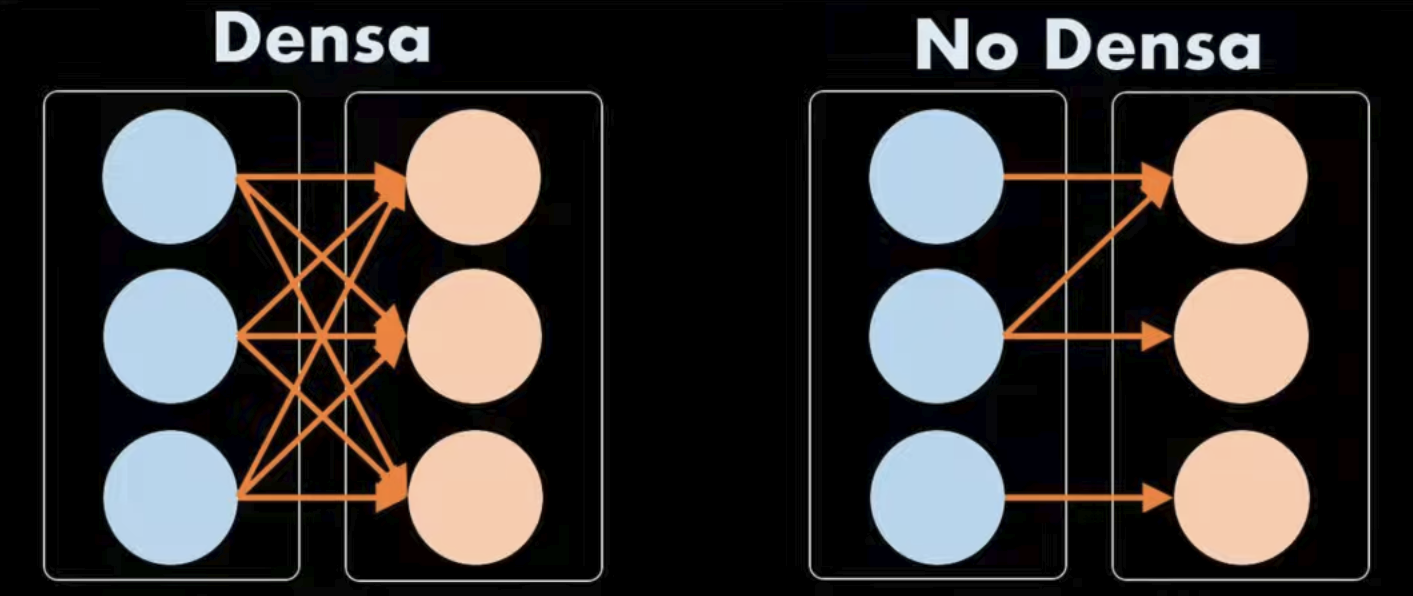

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.005), #Adam es un algoritmo que le permite a la red saber cómo ajustar los 
                                          #pesos y sesgos de la manera más eficiente posible. Su valor va de 0 a 1,
                                          #mientras más pequeño, mejor; pero tomará más tiempo para ejecutar. 
                                          #Akram et al. (2024) sugieren que su valor sea de 0.005.
    loss='mean_squared_error', #Considera que una poca cantidad de errores grandes es PEOR que
                              #una gran cantidad de errores pequeños.
    metrics=['accuracy'] #Para hacer un seguimiento de la precisión del modelo.
)

Ahora vamos a entrenar el modelo

In [17]:
#'tm' de 'trained model'
tm=model.fit(X_train,Y_train, epochs=1000, #Es la cantidad de 'vueltas' que quiero que le de a los datos
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=500)], #Datos que vienen de Akram et al. (2024)
          batch_size=6, #Datos que vienen de Akram et al. (2024)
          verbose=False, #Esto sólo es para que no me imprima mucho texto mientras se entrena el modelo 
          validation_data=(X_test, Y_test))

Creamos un gráfico que nos indique el rendimiento por cada epoch. Podemos ver que a partir del epoch 400 el modelo deja de perder datos de manera significativa, se mantiene la pérdida.

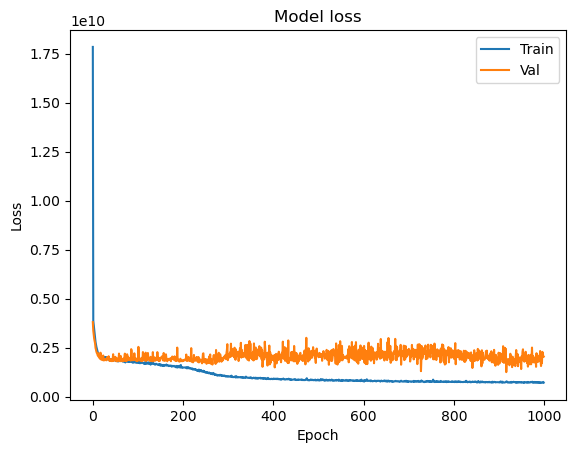

In [18]:
import matplotlib.pyplot as plt

plt.plot(tm.history['loss'])
plt.plot(tm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Vamos a ver qué tan bien se comporta el modelo comparando el precio que debería salir de la predicción versus el precio real de mis datos de entrenamiento. 

Primero, creamos un dataframe que una los dos valores.

In [19]:
# Obtener las predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Crear un DataFrame para facilitar la visualización
df_predictions = pd.DataFrame({'Real': Y_train['SalePrice'], 'Predicho': y_train_pred.flatten()})

37/37 [==============================] - 0s 1ms/step


Y ahora graficamos. *Seaborn* es una librería que se utiliza para graficar junto a *Matplotlib*, cargada previamente. Por su parte, *r2_score* es una función de *sklearn*, que también hemos usado antes.

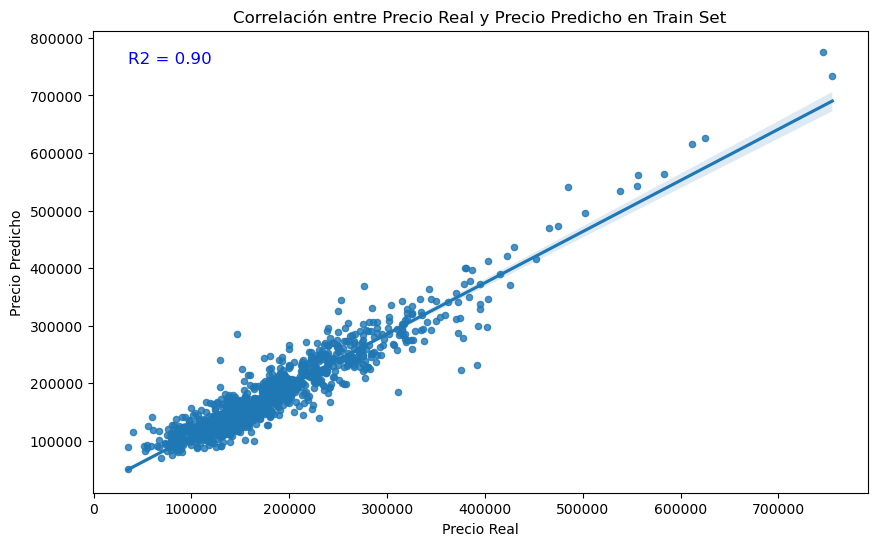

In [20]:
import seaborn as sns
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación (R2)
r2_value = r2_score(df_predictions['Real'], df_predictions['Predicho'])

# Crear un gráfico de dispersión (scatter plot) con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Real', y='Predicho', data=df_predictions, scatter_kws={'s': 20})
plt.title('Correlación entre Precio Real y Precio Predicho en Train Set')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.text(df_predictions['Real'].min(), df_predictions['Predicho'].max(), f'R2 = {r2_value:.2f}', ha='left', va='top', fontsize=12, color='blue')
plt.show()

Y ahora hacemos lo mismo con los datos de testeo.

10/10 [==============================] - 0s 2ms/step


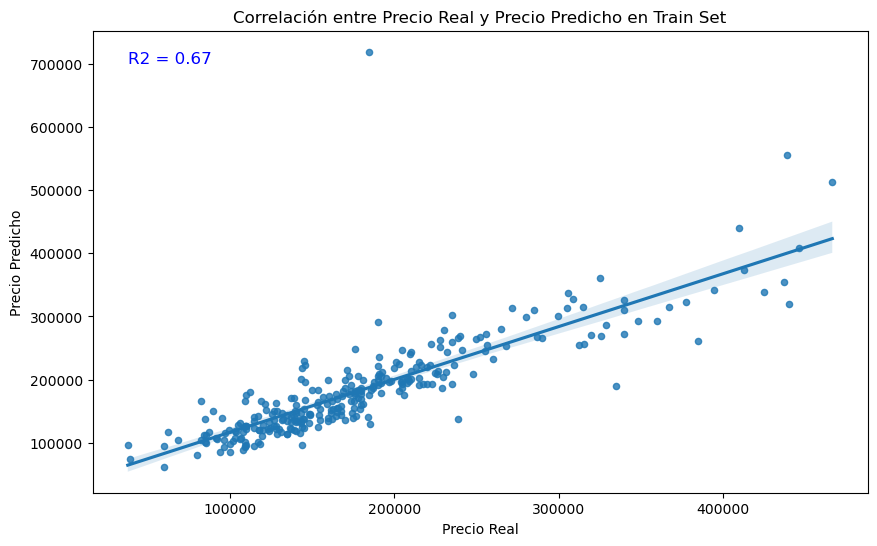

In [21]:
# Obtener las predicciones en el conjunto de testeo
y_test_pred = model.predict(X_test)

# Crear un DataFrame para facilitar la visualización
df_predictions2 = pd.DataFrame({'Real': Y_test['SalePrice'], 'Predicho': y_test_pred.flatten()})

# Calcular el coeficiente de determinación (R2)
r2_value = r2_score(df_predictions2['Real'], df_predictions2['Predicho'])

# Crear un gráfico de dispersión (scatter plot) con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Real', y='Predicho', data=df_predictions2, scatter_kws={'s': 20})
plt.title('Correlación entre Precio Real y Precio Predicho en Train Set')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.text(df_predictions2['Real'].min(), df_predictions2['Predicho'].max(), f'R2 = {r2_value:.2f}', ha='left', va='top', fontsize=12, color='blue')
plt.show()

Siguiendo el ejemplo de Akram et al. (2024), calcularemos cinco parámetros que nos permitan comparar el rendimiento de este modelo con Random Forest y OLS.

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Suponiendo que 'tm' es tu modelo ya entrenado

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Coefficient of determination (R2)
r2 = r2_score(Y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)

# Relative Absolute Error (RAE)
rae = np.sum(np.abs(y_pred - Y_test)) / np.sum(np.abs(np.mean(Y_test) - Y_test))

# Root Relative Squared Error (RRSE)
rrse = np.sqrt(np.sum((y_pred - Y_test) ** 2) / np.sum((np.mean(Y_test) - Y_test) ** 2))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

# Imprimir resultados
print("Coefficient of Determination (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Relative Absolute Error (RAE):", rae)
print("Root Relative Squared Error (RRSE):", rrse)
print("Root Mean Squared Error (RMSE):", rmse)


10/10 [==============================] - 0s 1ms/step
Coefficient of Determination (R2): 0.6654279607533017
Mean Absolute Error (MAE): 24952.931640625
Relative Absolute Error (RAE): SalePrice    0.433352
dtype: float64
Root Relative Squared Error (RRSE): SalePrice    0.578422
dtype: float64
Root Mean Squared Error (RMSE): 45124.73925429527


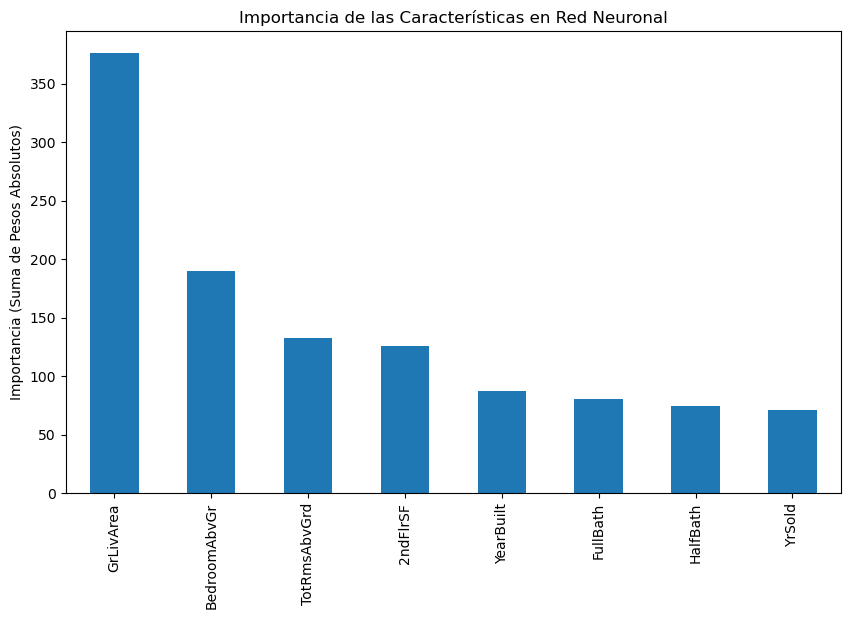

In [23]:
# Obtener los pesos de la red neuronal
weights = model.get_weights()

# Crear un DataFrame con los pesos y sus correspondientes nombres de características
weights_df = pd.DataFrame(weights[0].T, columns=X.columns)  # Transponer los pesos

# Calcular la importancia de las características sumando los valores absolutos de los pesos
feature_importance = weights_df.abs().sum()

# Ordenar la importancia de las características
feature_importance = feature_importance.sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la importancia
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Importancia de las Características en Red Neuronal')
plt.ylabel('Importancia (Suma de Pesos Absolutos)')
plt.show()
